### <span style = 'color:green'>problem statement : detect credit card fraud transactions using Logistic Regression</span>

.


- Logistic Regression is a Machine Learning algorithm used to make predictions to find the value of a dependent variable such as the condition of a tumor (malignant or benign), classification of email (spam or not spam), or admission into a university (admitted or not admitted) by learning from independent variables (various features relevant to the problem).

**Difference between Logistic and Linear Regression**
The major difference between Logistic and Linear Regression is that Linear Regression is used to solve regression problems whereas Logistic Regression is used for classification problems.

**About the dataset**
- The dataset contains transactions made by credit cards in September 2013 by European cardholders.This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions



**Expected output**
- **Use histogram to represent to all the data**
- **Use Classification Report for scores**
- **Plot confusion matrix**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


As there are no missing values there is no need to impute it and since all the independent features is in float so there is no need to encode but since the amount and tine column is not statndardised hence we have to convert into standard for the better understandings of the data.

In [6]:
# dependent varibale
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

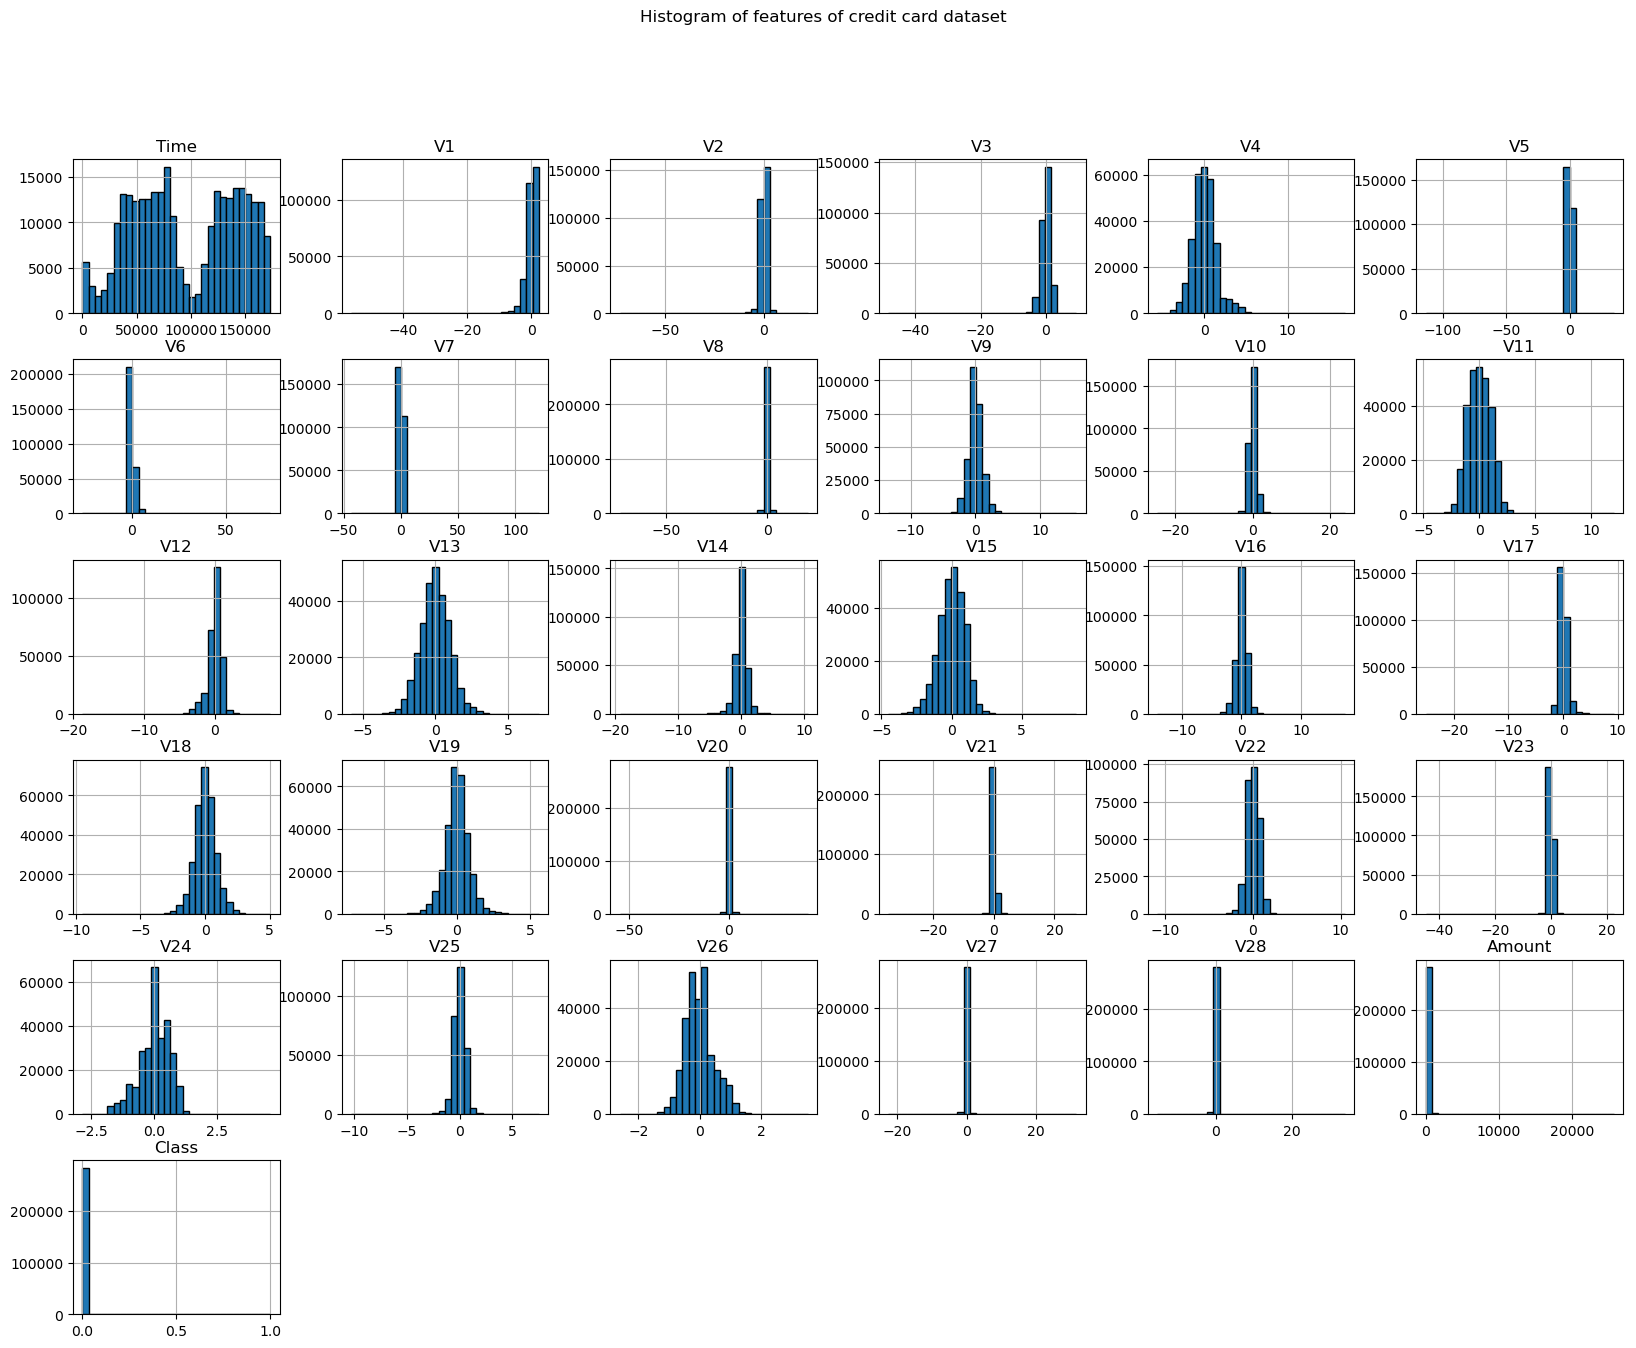

In [11]:
# Plot histograms for each feature
df.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle("Histogram of features of credit card dataset")
plt.show()



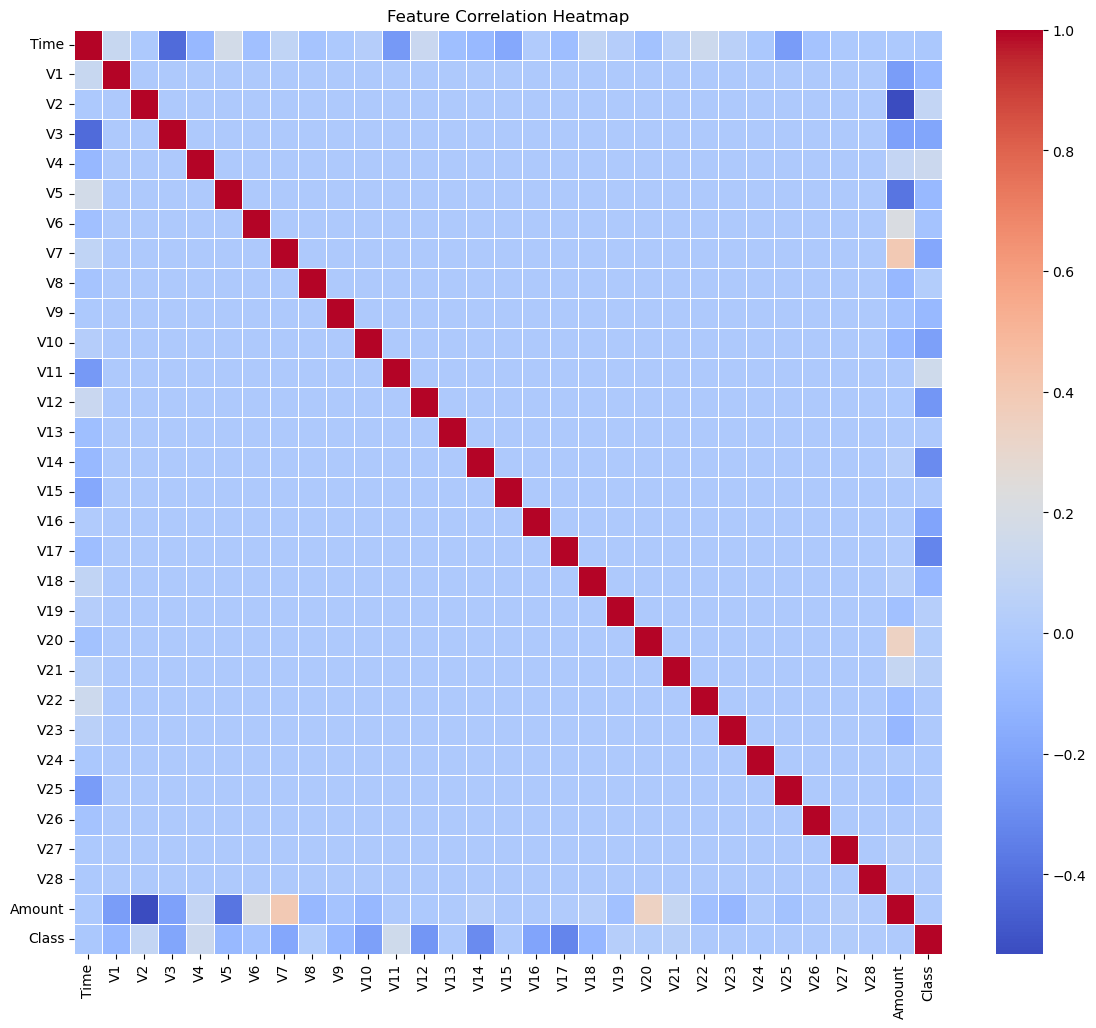

In [32]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm", linewidths=0.5, annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [15]:
# now standardised the data
from sklearn.preprocessing import StandardScaler
# Standardize 'Amount' and 'Time' features
scaler = StandardScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])


In [17]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [18]:
x

array([[-1.99658302, -1.35980713, -0.07278117, ...,  0.13355838,
        -0.02105305,  0.24496426],
       [-1.99658302,  1.19185711,  0.26615071, ..., -0.0089831 ,
         0.01472417, -0.34247454],
       [-1.99656197, -1.35835406, -1.34016307, ..., -0.05535279,
        -0.05975184,  1.16068593],
       ...,
       [ 1.6419735 ,  1.91956501, -0.30125385, ...,  0.00445477,
        -0.02656083, -0.0818393 ],
       [ 1.6419735 , -0.24044005,  0.53048251, ...,  0.10882073,
         0.10453282, -0.31324853],
       [ 1.64205773, -0.53341252, -0.18973334, ..., -0.00241531,
         0.01364891,  0.51435531]])

In [19]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
#Now split dataset into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
x_train

array([[ 1.02211246e+00,  1.95504092e+00, -3.80782711e-01, ...,
         4.51682478e-02, -4.71447917e-02, -3.13288512e-01],
       [ 4.70837074e-01, -4.00975239e-01, -6.26942769e-01, ...,
        -3.70468822e-01, -1.44791686e-01, -1.69717237e-01],
       [ 1.15294534e+00,  7.25090164e-02,  8.20565650e-01, ...,
         2.06394866e-01,  7.02877702e-02, -3.05292340e-01],
       ...,
       [-3.16265999e-01, -1.46608925e-01,  9.92946123e-01, ...,
        -1.21139194e-01, -1.96195328e-01, -3.37476933e-01],
       [-1.44938732e-01, -2.94863809e+00,  2.35484929e+00, ...,
         4.96912107e-01,  3.35821632e-01, -3.49231307e-01],
       [-3.88157751e-01,  1.23317435e+00, -7.84850501e-01, ...,
         1.21657270e-03,  3.85878912e-02,  9.85543469e-02]])

In [22]:
x_test

array([[-1.12257390e+00, -1.65265066e+01,  8.58497180e+00, ...,
        -2.01857525e+00, -1.04280417e+00,  1.10283362e+00],
       [-1.06453826e+00,  3.39812064e-01, -2.74374524e+00, ...,
         4.09958027e-02,  1.02037825e-01,  1.72625520e+00],
       [-1.24936366e+00,  1.39959027e+00, -5.90701288e-01, ...,
         1.14086454e-02,  4.63414166e-03, -2.29288721e-01],
       ...,
       [ 1.00398159e+00,  4.04414982e-02, -1.09736789e-01, ...,
         3.57844730e-01,  3.54379443e-01, -3.22723995e-01],
       [-7.50859429e-01, -4.95047586e-01,  9.91480934e-01, ...,
         4.05292111e-02, -2.69775457e-01, -3.38876264e-01],
       [-9.67608638e-01, -1.59048567e+00,  9.92415466e-01, ...,
         1.25749856e-01, -6.07225509e-01,  3.27027611e+00]])

In [23]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
y_test

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

# we use logistic reression model

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [29]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Make predictions on the test set
y_pred = model.predict(x_test)
#  print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



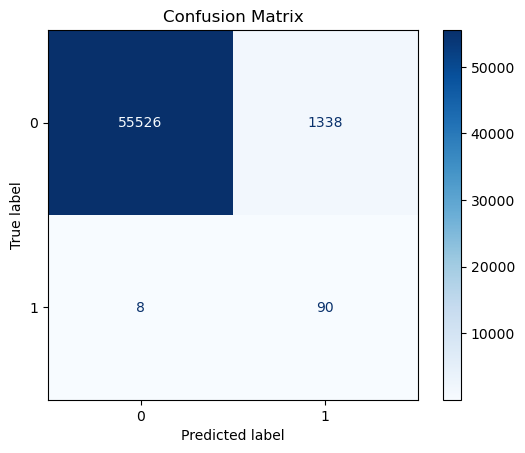

In [30]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [31]:
from sklearn.metrics import accuracy_score,recall_score,f1_score
ac=accuracy_score(y_test,y_pred)
re_score=recall_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)
ac,f1score,re_score


(0.9763702117200941, 0.11795543905635648, 0.9183673469387755)